In [123]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# Loading the dataset

Job_postings = pd.read_csv('job_postings.csv')
Job_postings.head()

,Unnamed: 0,Job Posting ID,Job Posting Date,Job Title,Job Title Full,Job Title Additional Info,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Minimum Pay,Maximum Pay,Pay Rate,Number of Applicants,Company Name,Company Industry,Company Size
0,0,2701524240,1/1/2017,Software Engineer,Software Engineer,Java Full Stack | Remote,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,NaN,NaN,NaN,6.0,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,1,2719108338,1/1/2017,Data Engineer,Senior Azure Data Engineer,NaN,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,NaN,NaN,NaN,1.0,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2,2719503370,1/1/2017,Software Engineer,Software Engineer I,NaN,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,NaN,NaN,NaN,16.0,Paycor,Computer Software,"1,001-5,000 employees"
3,3,2734877741,1/1/2017,Business Analyst,Associate Business Analyst,Telecommute,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",NaN,NaN,NaN,1.0,Optum,Hospital & Health Care,"10,001+ employees"
4,4,2752415616,1/1/2017,Developer,Swift Developer,NaN,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",NaN,NaN,NaN,NaN,Toptal,Internet,"1,001-5,000 employees"


## Data Cleaning

In [125]:
# Checking the shape of the dataset

Job_postings.shape

(25114, 18)

In [126]:
# Checking the datatypes of the columns

Job_postings.dtypes

Unnamed: 0                     int64
Job Posting ID                 int64
Job Posting Date              object
Job Title                     object
Job Title Full                object
Job Title Additional Info     object
Job Position Type             object
Job Position Level            object
Years of Experience            int64
Job Skills                    object
Job Location                  object
Minimum Pay                  float64
Maximum Pay                  float64
Pay Rate                      object
Number of Applicants         float64
Company Name                  object
Company Industry              object
Company Size                  object
dtype: object

In [127]:
# Converting Job Posting Date to datetime format

Job_postings['Job Posting Date'] = pd.to_datetime(Job_postings['Job Posting Date'])

In [128]:
# Missing values

Job_postings.isnull().sum()

Unnamed: 0                       0
Job Posting ID                   0
Job Posting Date                 0
Job Title                        0
Job Title Full                   0
Job Title Additional Info    16927
Job Position Type                0
Job Position Level               0
Years of Experience              0
Job Skills                       0
Job Location                     0
Minimum Pay                  23302
Maximum Pay                  23302
Pay Rate                     23302
Number of Applicants          7585
Company Name                    61
Company Industry               219
Company Size                   222
dtype: int64

In [129]:
# Filter the dataset to include relevant job titles

Job_postings = Job_postings[Job_postings['Job Title'].isin(["Data Analyst", 
    "Data Engineer", 
    "Data Scientist", 
    "Machine Learning Engineer", 
    "Data Science Manager"])]

In [130]:
# Duplicate the main dataset

Job_postings2 = Job_postings.copy()

# Retain only the relevant columns

Job_postings2 = Job_postings2[['Job Title', 'Job Skills']]

# Clean the 'Job Skills' column to remove unwanted characters
# and split it by comma delimiter to create a row for each skill along with the associated Job Posting ID
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('[', '')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace(']', '')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace("'", "")
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace(' ', '')
Job_postings2 = Job_postings2.dropna(subset=['Job Skills'])

# Split the 'Job Skills' column by comma and create a new row for each skill
Job_postings2 = Job_postings2.assign(**{'Job Skills':Job_postings2['Job Skills'].str.split(',')}).explode('Job Skills')

# Remove rows with a blank 'Job Skills' column
Job_postings2 = Job_postings2[Job_postings2['Job Skills'] != '']

# Display the first 5 rows of the dataset
Job_postings2.head()

# Checking the job skills column
Job_postings2['Job Skills'].unique()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_17148\2209717420.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('[', '')
C:\Users\HomePC\AppData\Local\Temp\ipykernel_17148\2209717420.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace(']', '')


array(['data_lake', 'cloud', 'python', 'spark', 'github', 'warehousing',
       't-sql', 'ci/cd', 'sql', 'apache', 'azure', 'scala', 'coding',
       'data_lakes', 'hadoop', 'devops', 'iot', 'aws', 'pyspark',
       'redshift', 'etl', 'nosql', 'machine_learning', 'database', 'ibm',
       'oracle', 'microsoft', 'programming', 'postgresql', 'linux', 'go',
       'power_bi', 'gcp', 'sap', 'bi', 'saas', 'tableau', 'atlassian',
       'powerbi', 'excel', 'r', 'ai', 'back-end', 'java', 'javascript',
       'mysql', 'git', 'scrum', 'airflow', 'agile', 'mongo', 'cognos',
       'dax', 'sas', 'jira', 'snowflake', 'agile/scrum', 'spss',
       'codebase', 'ml', 'pytorch', 'tensorflow', 'mlops', 'server',
       'pandas', 'slack', 'twilio', 'ai/ml', 'ruby', 'node.js', 'looker',
       'redis', 'postgres', 'macros', 'vba', 'docker', 'c', 'bash',
       'alteryx', 'word', 'perl', 'shell', 'json', 'kanban', 'bitbucket',
       'powerpoint', 'rust', 'kotlin', 'mongodb', 'css', 'html', 'rshiny',
    

In [131]:
# Replacing "power_bi" with "powerbi"

Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('power_bi', 'powerbi')

In [132]:
# Calculating the average pay

Job_postings['Average Pay'] = (Job_postings['Minimum Pay'] + Job_postings['Maximum Pay'])/2

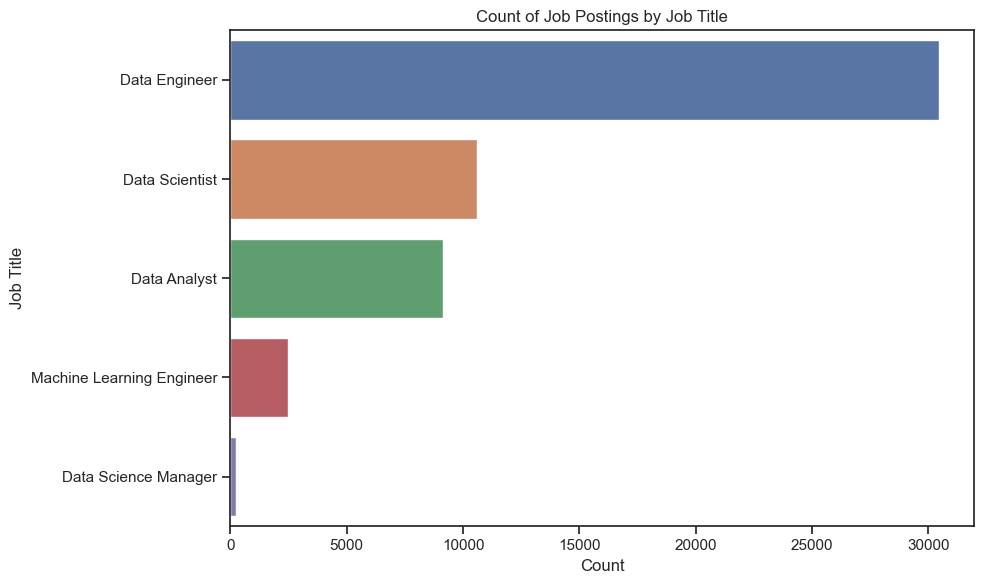

In [133]:
# Visualize the counts of the different job titles compared to each other
plt.figure(figsize=(10, 6))
sns.countplot(data=Job_postings2, y='Job Title', order=Job_postings2['Job Title'].value_counts().index)
plt.title('Count of Job Postings by Job Title')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

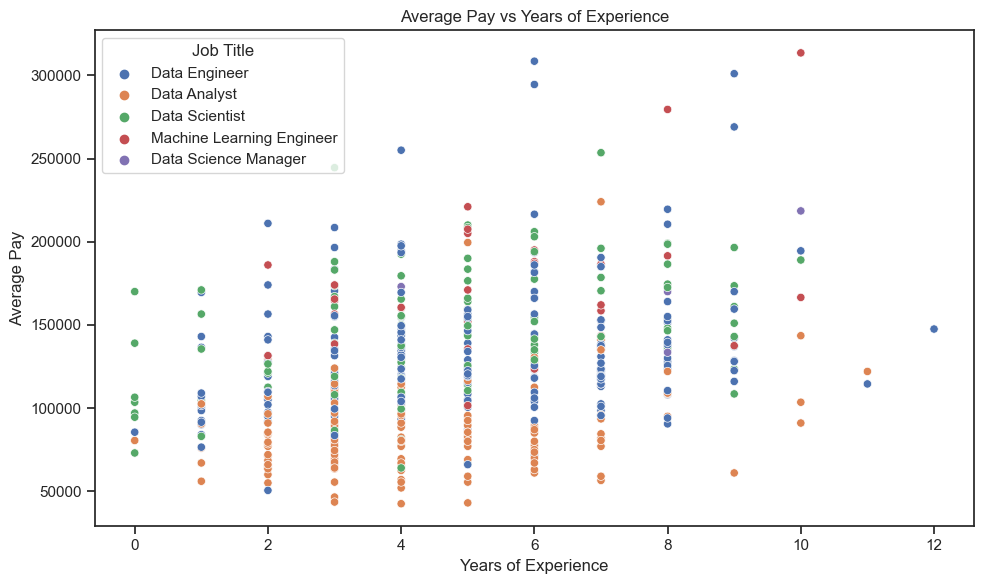

In [134]:

# Visualize the average pay versus years of experience for the specified job titles
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Average Pay', hue='Job Title', data=Job_postings)
plt.title('Average Pay vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Pay')
plt.tight_layout()
plt.show()

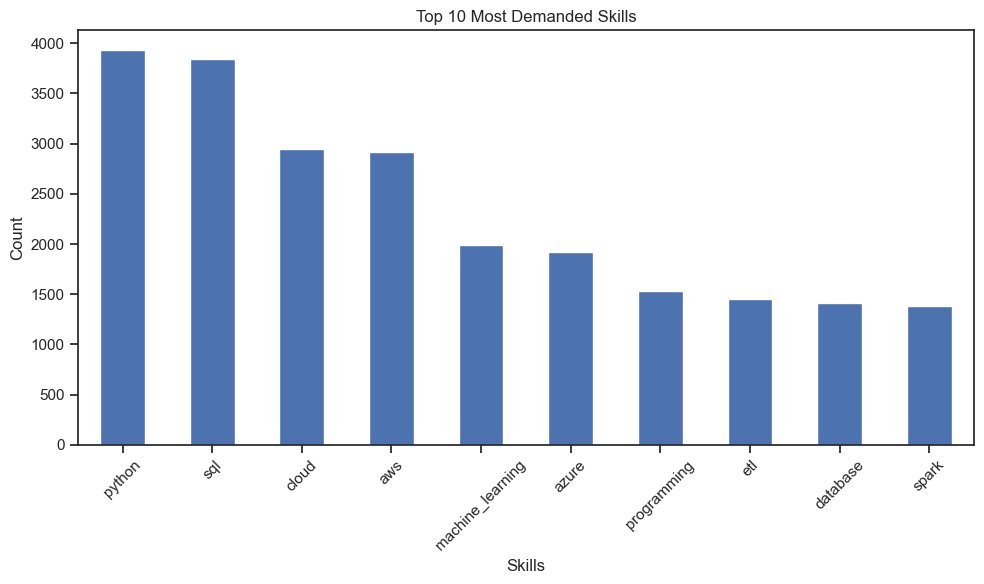

In [135]:
# Visualize the top 10 most demanded skills in the job market
top_skills = Job_postings2['Job Skills'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar')
plt.title('Top 10 Most Demanded Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

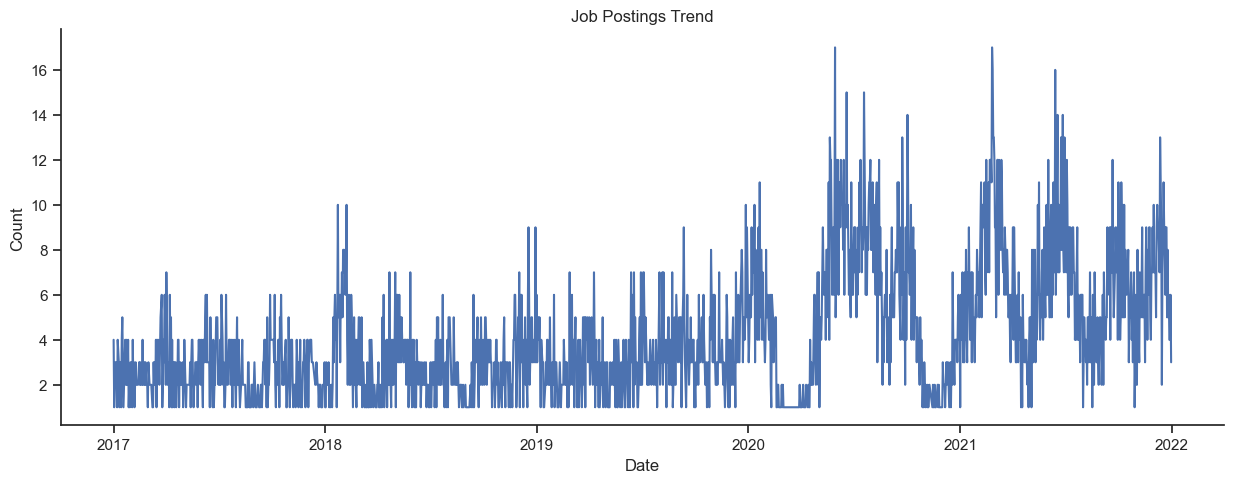

In [136]:
# Plot the trend of job postings over time (by date)

Postings_by_date = Job_postings.groupby('Job Posting Date').size().reset_index(name='Count')

sns.relplot(x='Job Posting Date', y='Count', kind='line', data=Postings_by_date, aspect=2.5)
plt.title('Job Postings Trend')
plt.xlabel('Date')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


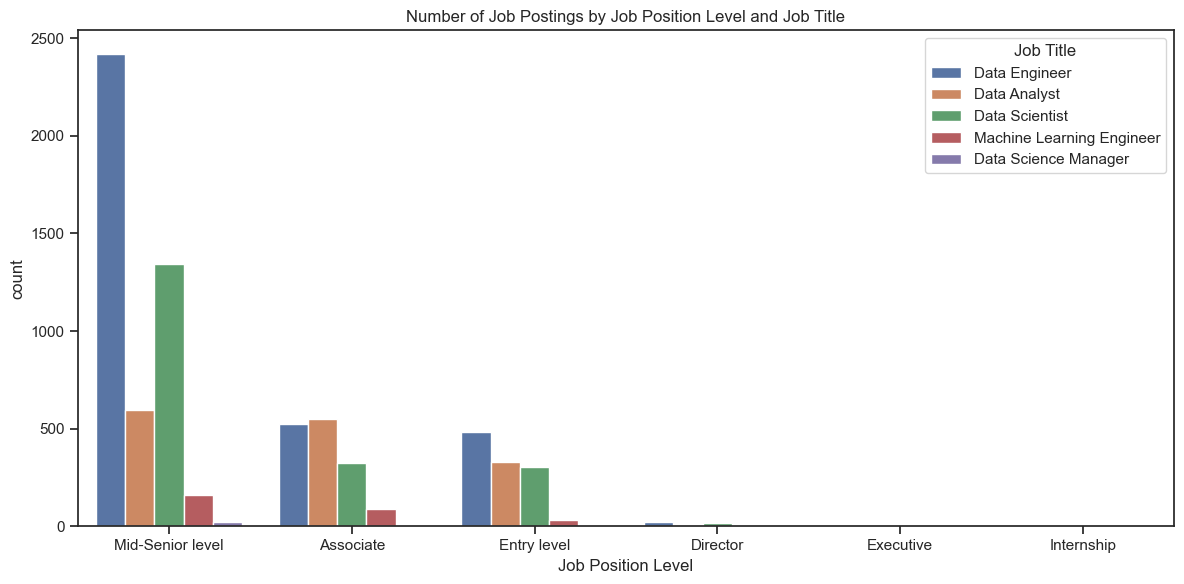

In [137]:
# Number of job postings for each 'Job Position Level' across different job titles

plt.figure(figsize=(12, 6))
sns.countplot(data=Job_postings, x='Job Position Level', hue='Job Title')
plt.title('Number of Job Postings by Job Position Level and Job Title')
plt.tight_layout()
plt.show()

c:\Users\HomePC\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\HomePC\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\HomePC\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\HomePC\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\HomePC\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\HomePC\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
c:\Users\HomePC\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: M

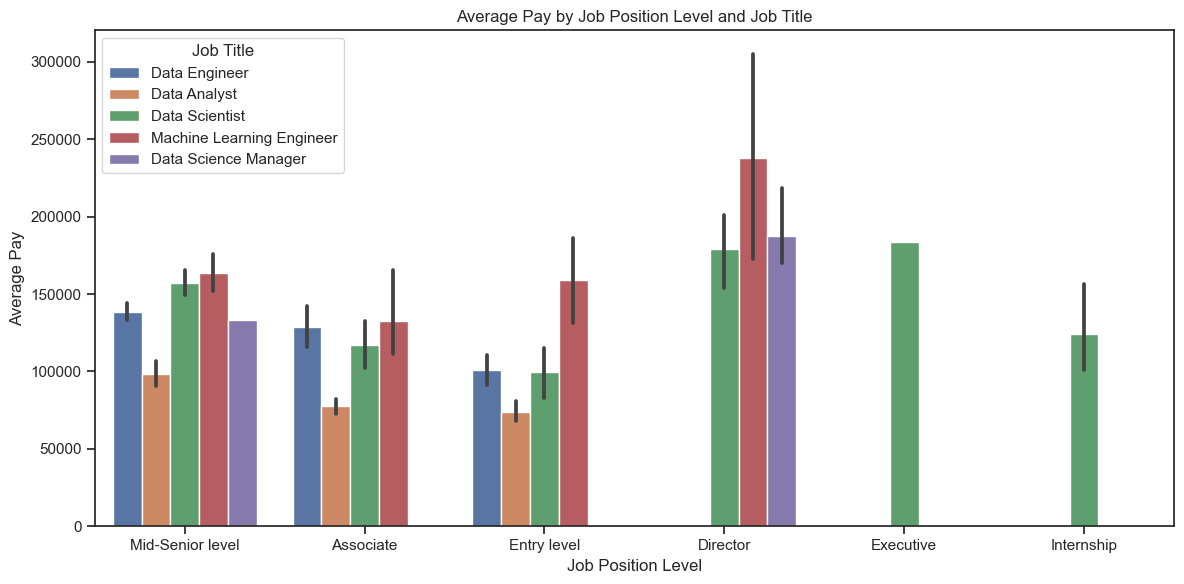

In [138]:
# Average pay for each 'Job Position Level' across different job titles

plt.figure(figsize=(12, 6))
sns.barplot(data=Job_postings, x='Job Position Level', y='Average Pay', hue='Job Title')
plt.title('Average Pay by Job Position Level and Job Title')
plt.tight_layout()
plt.show()

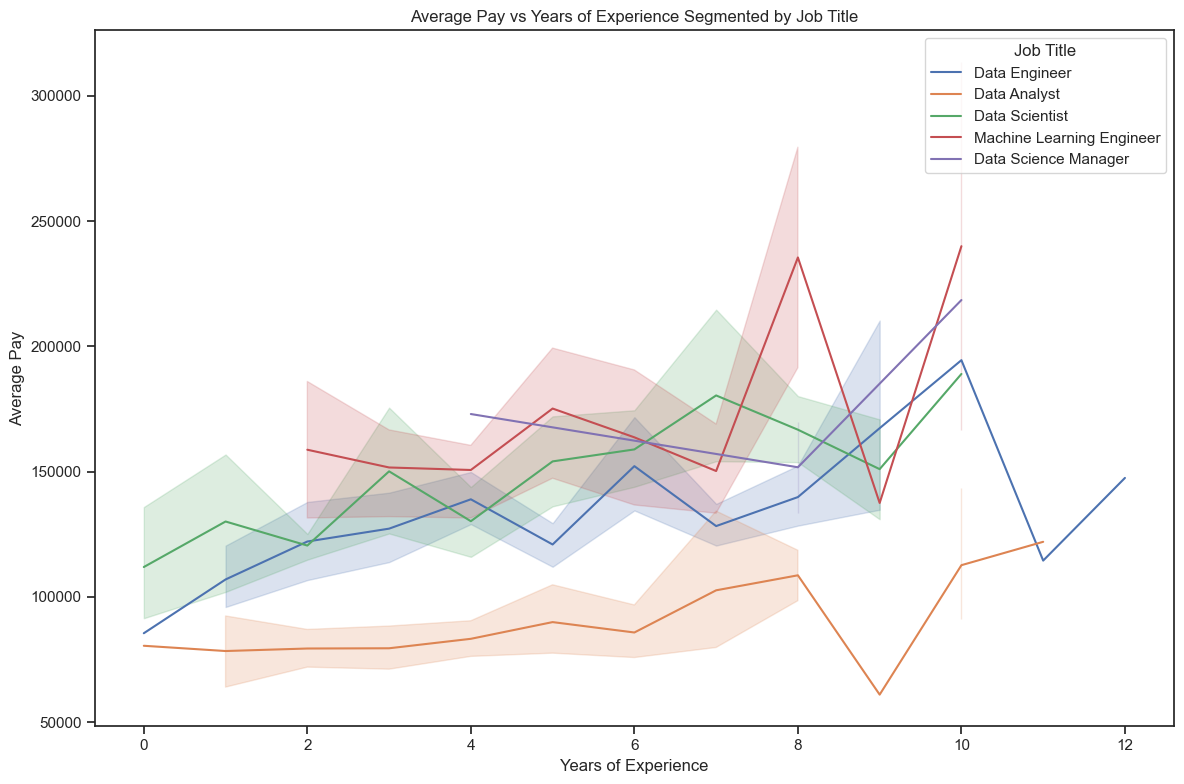

In [139]:
# Visualize the average pay versus years of experience segmented by job title
plt.figure(figsize=(12, 8))
sns.lineplot(x='Years of Experience', y='Average Pay', hue='Job Title', data=Job_postings)
plt.title('Average Pay vs Years of Experience Segmented by Job Title')
plt.xlabel('Years of Experience')
plt.ylabel('Average Pay')
plt.tight_layout()
plt.show()


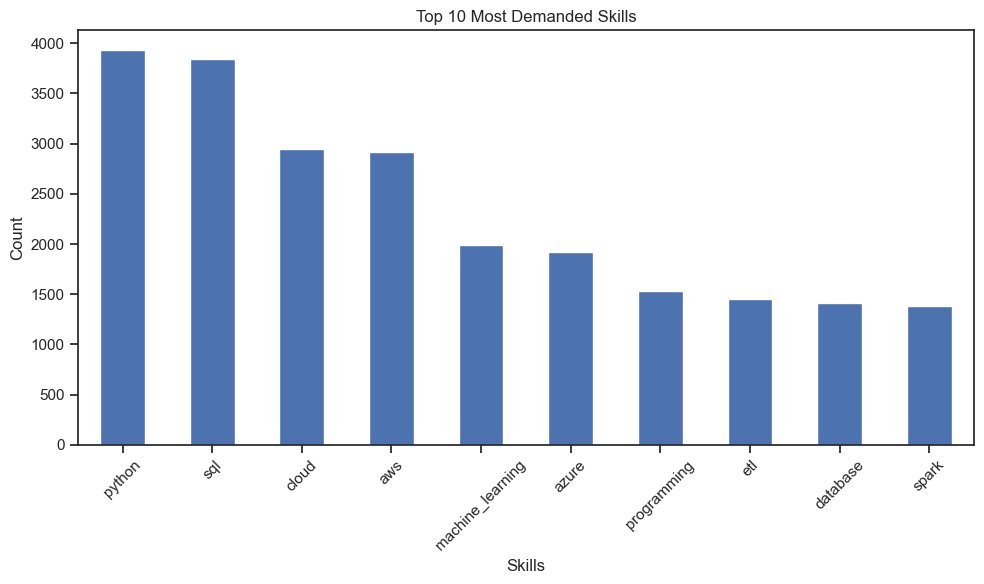

In [140]:
# Top 10 in-demand skills
top_skills = Job_postings2['Job Skills'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar')
plt.title('Top 10 Most Demanded Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [141]:
# Calculate the total number of job postings for each job title

Total_postings = Job_postings.groupby('Job Title')['Job Posting ID'].nunique().reset_index(name='Total Job Postings')

# Calculate the count of each skill for each job title

Skills_count = Job_postings2.groupby(['Job Title', 'Job Skills']).size().reset_index(name='Skill Count')

# Merge the data to calculate the likelihood of each skill appearing in a job posting for each job title

Skills_likelihood = pd.merge(Skills_count, Total_postings, on='Job Title')
Skills_likelihood['Likelihood'] = (Skills_likelihood['Skill Count'] / Skills_likelihood['Total Job Postings']) * 100

Skills_likelihood.head()


,Job Title,Job Skills,Skill Count,Total Job Postings,Likelihood
0,Data Analyst,agile,186,1485,12.525253
1,Data Analyst,agile/scrum,1,1485,0.067340
2,Data Analyst,ai,61,1485,4.107744
3,Data Analyst,ai/ml,3,1485,0.202020
4,Data Analyst,airflow,39,1485,2.626263


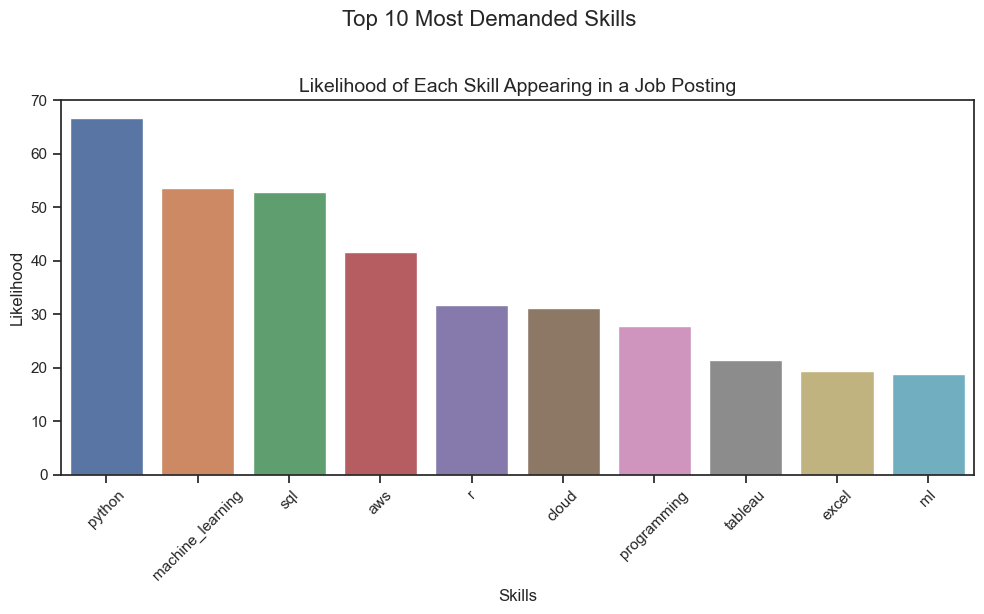

In [142]:
# Likelihood of each skill appearing in a job posting for each job title
top_skills = Skills_likelihood.groupby('Job Skills')['Likelihood'].mean().reset_index()
top_skills = top_skills.nlargest(10, 'Likelihood')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_skills, x='Job Skills', y='Likelihood', order=top_skills.sort_values('Likelihood', ascending=False)['Job Skills'])
plt.suptitle('Top 10 Most Demanded Skills ', fontsize=16, y=1.02)
plt.title('Likelihood of Each Skill Appearing in a Job Posting', fontsize=14, y=1.00)
plt.xlabel('Skills')
plt.ylabel('Likelihood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [143]:
# Group data by 'Company Industry' to find the average years of experience, the count of postings, and the most common job position level for each industry
industry_analysis_data = Job_postings.groupby('Company Industry').agg(
    Average_Years_of_Experience=('Years of Experience', 'mean'),
    Posting_Count=('Job Posting ID', 'nunique'),
    Most_Common_Job_Position_Level=('Job Position Level', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
).reset_index()

# Display the first few rows of the result
industry_analysis_data.head()

,Company Industry,Average_Years_of_Experience,Posting_Count,Most_Common_Job_Position_Level
0,2 school alumni,5.000000,3,Mid-Senior level
1,Airlines/Aviation,2.000000,1,Entry level
2,Apparel & Fashion,3.133333,15,Entry level
3,Automotive,2.166667,24,Entry level
4,Aviation & Aerospace,3.333333,3,Mid-Senior level


In [144]:
# Filter down to the top 10 industries by the number of job postings
top_10_industries = industry_analysis_data.nlargest(10, 'Posting_Count')

# Display the top 10 industries
top_10_industries

,Company Industry,Average_Years_of_Experience,Posting_Count,Most_Common_Job_Position_Level
49,Internet,4.888140,2226,Mid-Senior level
82,Staffing & Recruiting,4.992355,1308,Mid-Senior level
46,Information Technology & Services,4.403330,1081,Mid-Senior level
14,Computer Software,3.989770,782,Mid-Senior level
30,Financial Services,4.019417,309,Mid-Senior level
40,Hospital & Health Care,3.819328,238,Associate
58,Marketing & Advertising,4.052632,114,Associate
56,Management Consulting,4.712871,101,Mid-Senior level
38,"Health, Wellness & Fitness",3.510000,100,Associate
47,Insurance,3.595960,99,Entry level


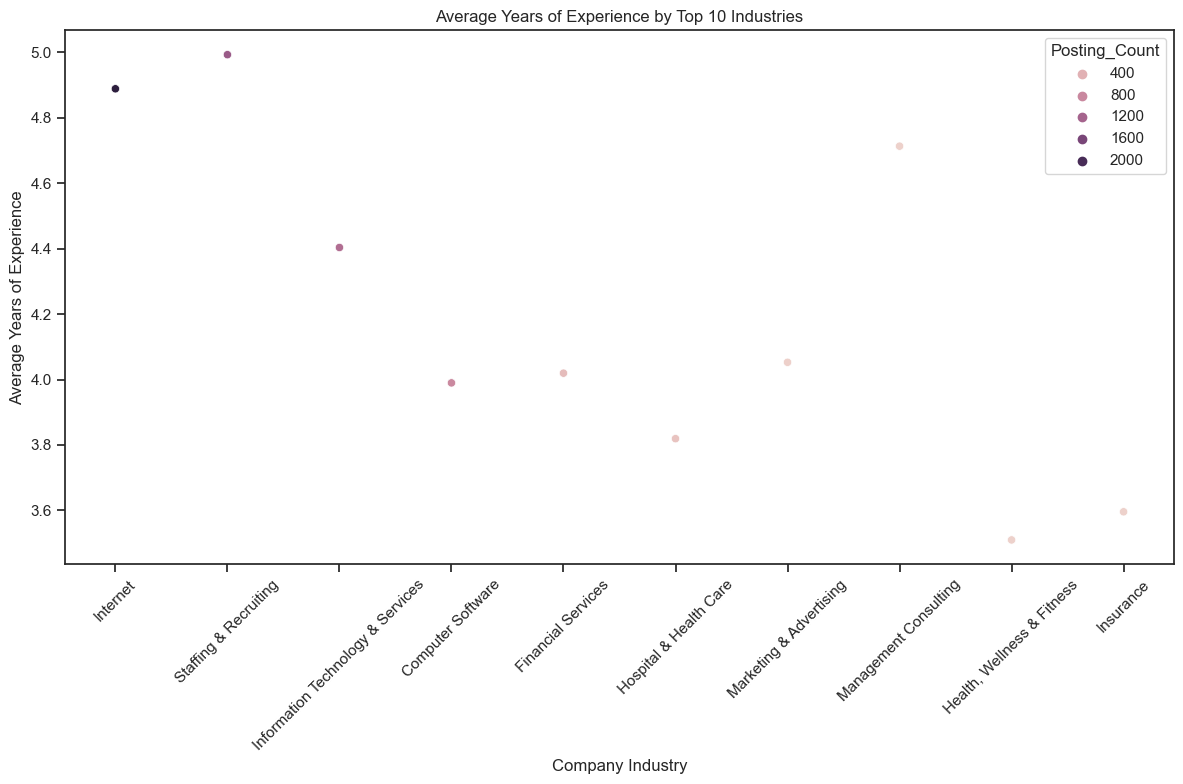

In [153]:
# Visualize the average years of experience by top 10 industries

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_10_industries, x='Company Industry', y='Average_Years_of_Experience', hue='Posting_Count')
plt.title('Average Years of Experience by Top 10 Industries')
plt.xlabel('Company Industry')
plt.ylabel('Average Years of Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

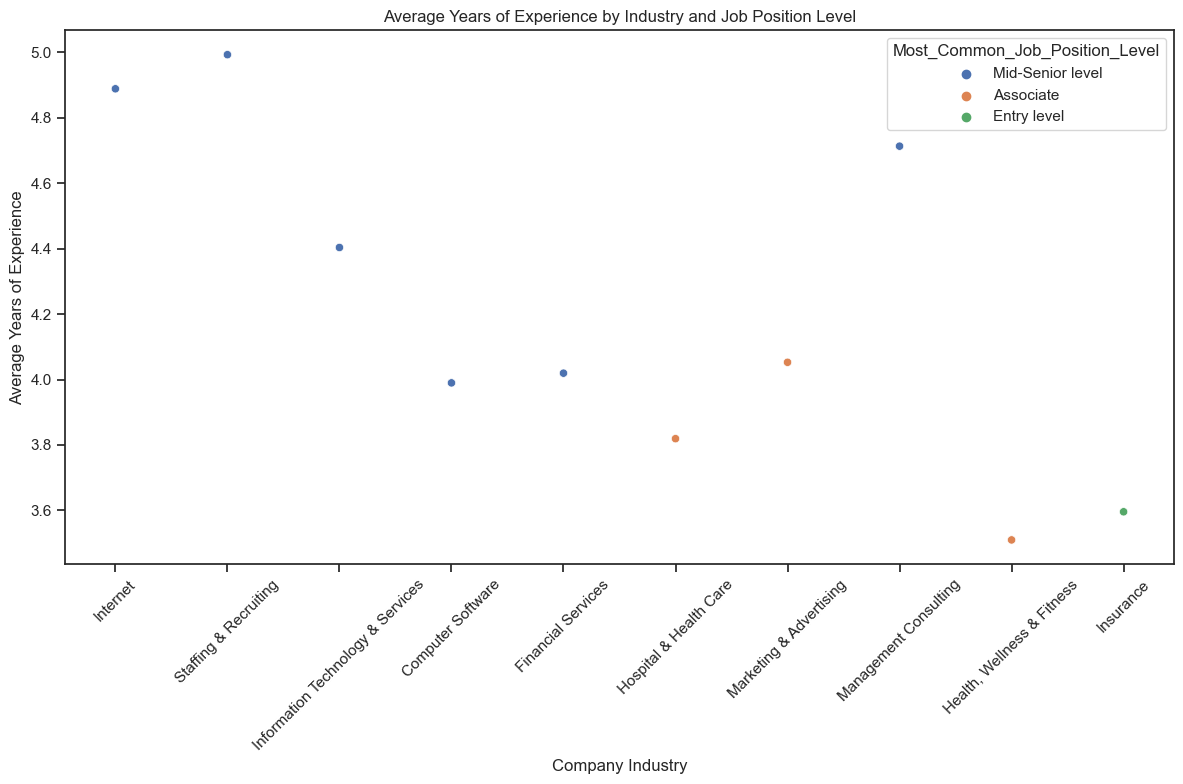

In [152]:
# Visualize the average years of experience by industry and job position level

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_10_industries, x='Company Industry', y='Average_Years_of_Experience', hue='Most_Common_Job_Position_Level')
plt.title('Average Years of Experience by Industry and Job Position Level')
plt.xlabel('Company Industry')
plt.ylabel('Average Years of Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()